In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [3]:
housingX, housingY = datasets.fetch_california_housing(return_X_y=True, as_frame=True)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(housingX, housingY, test_size=0.2, random_state=42)

# Linear Regression

In [10]:
%%time
housing_linear_regression = LinearRegression().fit(x_train, y_train)

CPU times: total: 0 ns
Wall time: 4 ms


CPU times: total: 0 ns

Wall time: 4 ms

In [11]:
housing_linreg_ypred = housing_linear_regression.predict(x_test)
housing_linreg_rmse = root_mean_squared_error(y_true=y_test, y_pred=housing_linreg_ypred)
print(f"Linear regression RMSE is {housing_linreg_rmse:.2f}")

Linear regression RMSE is 0.75


Linear regression RMSE is 0.75

In [12]:
housing_linreg_r2 = housing_linear_regression.score(x_test, y_test)
print(f"Linear regression Rsquared is {housing_linreg_r2:.2f}")

Linear regression Rsquared is 0.58


Linear regression Rsquared is 0.58

<Axes: xlabel='MedHouseVal'>

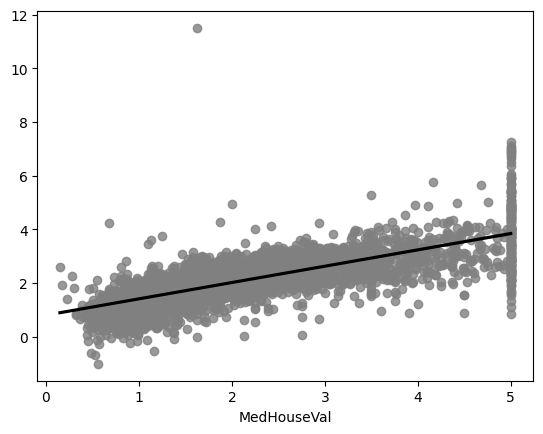

In [13]:
sns.regplot(x=y_test, y=housing_linreg_ypred, scatter_kws={"color": "grey"}, line_kws={"color": "black"})

# CART Model

In [14]:
housing_CART = DecisionTreeRegressor()
housing_CART_regression = housing_CART.fit(x_train, y_train)

In [15]:
%%time
housing_cart_ypred = housing_CART_regression.predict(x_test)

CPU times: total: 0 ns
Wall time: 3 ms


CPU times: total: 0 ns

Wall time: 3 ms

In [16]:
housing_cart_rmse = root_mean_squared_error(y_true=y_test, y_pred=housing_cart_ypred)
print ("CART RMSE is {0:.2f}".format(housing_cart_rmse))

CART RMSE is 0.70


CART RMSE is 0.70

In [17]:
housing_cart_r2 = housing_CART_regression.score(x_test, y_test)
print("Rsquared is {0:.2f}".format(housing_cart_r2))

Rsquared is 0.62


Rsquared is 0.62

<Axes: xlabel='MedHouseVal'>

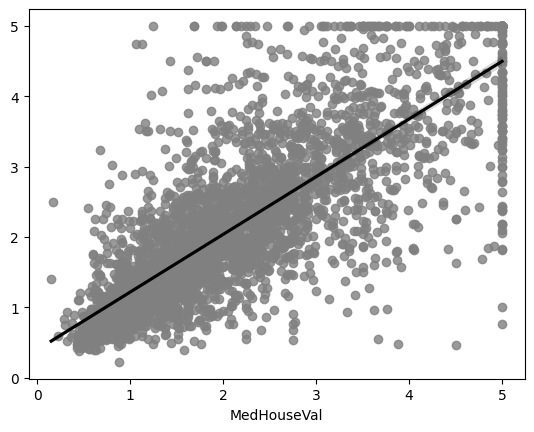

In [19]:
sns.regplot(x=y_test, y=housing_cart_ypred, scatter_kws={"color": "grey"}, line_kws={"color": "black"})

[Text(0.6464370707080562, 0.9857142857142858, 'x[0] <= 5.086\nsquared_error = 1.337\nsamples = 16512\nvalue = 2.072'),
 Text(0.3669847325010718, 0.9571428571428572, 'x[0] <= 3.074\nsquared_error = 0.834\nsamples = 13101\nvalue = 1.74'),
 Text(0.506710901604564, 0.9714285714285715, 'True  '),
 Text(0.1635386076161208, 0.9285714285714286, 'x[2] <= 4.314\nsquared_error = 0.561\nsamples = 6268\nvalue = 1.358'),
 Text(0.0744192883218409, 0.9, 'x[0] <= 2.215\nsquared_error = 0.679\nsamples = 2624\nvalue = 1.626'),
 Text(0.030161499425224697, 0.8714285714285714, 'x[2] <= 3.422\nsquared_error = 0.575\nsamples = 1404\nvalue = 1.377'),
 Text(0.011742129985188393, 0.8428571428571429, 'x[3] <= 1.027\nsquared_error = 0.832\nsamples = 482\nvalue = 1.775'),
 Text(0.0042832882331425275, 0.8142857142857143, 'x[7] <= -121.825\nsquared_error = 0.459\nsamples = 167\nvalue = 1.436'),
 Text(0.0013760047306619558, 0.7857142857142857, 'x[7] <= -121.96\nsquared_error = 1.416\nsamples = 26\nvalue = 1.777'),
 Te

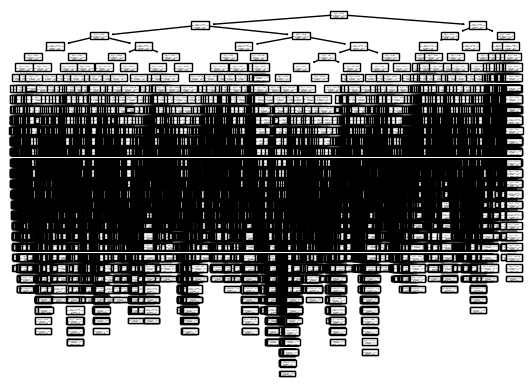

In [20]:
tree.plot_tree(housing_CART)

# Gradient boosting and random forest models

In [22]:
%%time
housing_gbt = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
housing_gbt_regression = housing_gbt.fit(x_train, y_train)

CPU times: total: 6.92 s
Wall time: 7.01 s


CPU times: total: 6.92 s

Wall time: 7.01 s

In [23]:
%%time 
housing_gbt_ypred = housing_gbt_regression.predict(x_test)

CPU times: total: 0 ns
Wall time: 12 ms


CPU times: total: 0 ns

Wall time: 12 ms

In [25]:
housing_gbt_rmse = root_mean_squared_error(y_true=y_test, y_pred=housing_gbt_ypred)
print(f'Gradient Boosting RMSE is {housing_gbt_rmse:.2f}')

Gradient Boosting RMSE is 0.48


Gradient Boosting RMSE is 0.48

In [26]:
housing_gbt_r2 = housing_gbt_regression.score(x_test, y_test)
print(f'Gradient Boosting Rsquared is {housing_gbt_r2:.2f}')

Gradient Boosting Rsquared is 0.82


Gradient Boosting Rsquared is 0.82

<Axes: xlabel='MedHouseVal'>

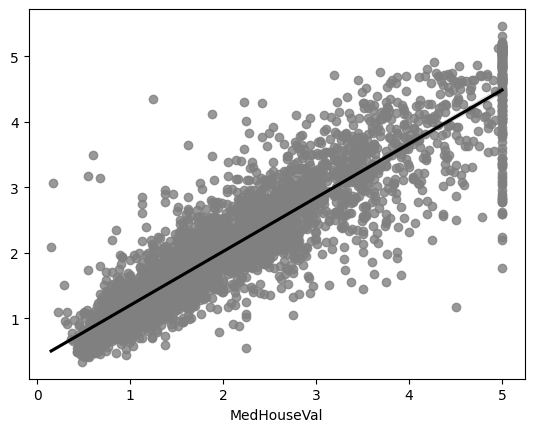

In [27]:
sns.regplot(x=y_test, y=housing_gbt_ypred, scatter_kws={"color": "grey"}, line_kws={"color": "black"})

# Regression model using random forest

In [28]:
%%time
housing_rf = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)
housing_rf_regression = housing_rf.fit(x_train, y_train)

CPU times: total: 4.41 s
Wall time: 4.42 s


CPU times: total: 4.41 s

Wall time: 4.42 s

In [30]:
%%time
housing_rf_ypred = housing_rf_regression.predict(x_test)

CPU times: total: 31.2 ms
Wall time: 29.9 ms


CPU times: total: 31.2 ms

Wall time: 29.9 ms

In [31]:
housing_rf_rmse = root_mean_squared_error(y_true=y_test, y_pred=housing_rf_ypred)
print(f'Random Forest RMSE is {housing_rf_rmse:.2f}')

Random Forest RMSE is 0.65


Random Forest RMSE is 0.65

In [32]:
housing_rf_r2 = housing_rf_regression.score(x_test, y_test)
print(f'Random Forest Rsquared is {housing_rf_r2:.2f}')

Random Forest Rsquared is 0.68


Random Forest Rsquared is 0.68

<Axes: xlabel='MedHouseVal'>

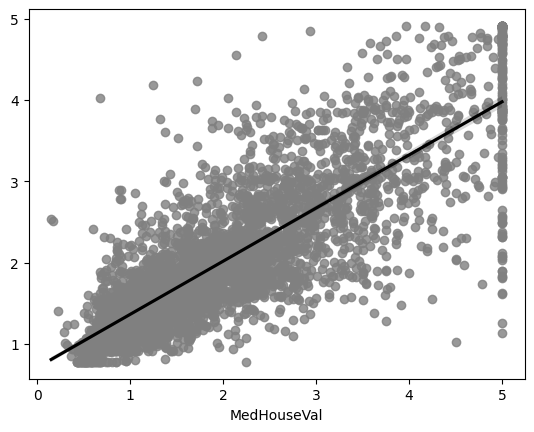

In [33]:
sns.regplot(x=y_test, y=housing_rf_ypred, scatter_kws={"color": "grey"}, line_kws={"color": "black"})